## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

## Reading dataset

In [2]:
ad = pd.read_csv('advertising.csv')
ad.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
# Standardization dataset
ad = (ad - ad.mean())/ad.std()
ad.head()

,TV,Radio,Newspaper,Sales
0,0.967425,0.979066,1.774493,1.548168
1,-1.194379,1.080097,0.667903,-0.694304
2,-1.512360,1.524637,1.779084,-0.905135
3,0.051919,1.214806,1.283185,0.858177
4,0.393196,-0.839507,1.278593,-0.215143


In [4]:
# Putting feature variable to X
X = ad[['TV','Radio','Newspaper']]
# Putting response variable to y
y = ad['Sales']

In [5]:
# IMPORTANT: We need to add an intercept variable when doing manual computation of the dataset
X['intercept'] = 1

In [6]:
X.head()

,TV,Radio,Newspaper,intercept
0,0.967425,0.979066,1.774493,1
1,-1.194379,1.080097,0.667903,1
2,-1.512360,1.524637,1.779084,1
3,0.051919,1.214806,1.283185,1
4,0.393196,-0.839507,1.278593,1


In [7]:
X = np.array(X)
y = np.array(y)

In [8]:
# Theta needed to be changed with the number of response varaible used (including interceptor).
theta = np.matrix(np.array([0,0,0,0])) 
alpha = 0.01
iterations = 1000

## Cost Function

![title](https://i.stack.imgur.com/O752N.png)

In [9]:
def compute_cost(X, y, theta):
    return np.sum(np.square(np.matmul(X, theta) - y)) / (2 * len(y))

## Resource
Solving using basic formulas of gradient descent as explained in post: https://www.techladder.in/article/simple-linear-regression-detailed-explanation

In [10]:
def gradient_descent_multi(X, y, theta, alpha, iterations):
    theta = np.zeros(X.shape[1])
    m = len(X)
    gdm_df = pd.DataFrame( columns = ['Bets','cost'])

    for i in range(iterations):
        gradient = (1/m) * np.matmul(X.T, np.matmul(X, theta) - y)
        theta = theta - alpha * gradient
        cost = compute_cost(X, y, theta)
        gdm_df.loc[i] = [theta,cost]

    return gdm_df

In [11]:
gradient_descent_multi(X, y, theta, alpha, iterations).head()

,Bets,cost
0,"[0.007783133027372984, 0.005733414616982002, 0...",0.487696
1,"[0.015484416820036633, 0.01139753374169965, 0....",0.478118
2,"[0.023104730166288424, 0.01699325776593817, 0....",0.468760
3,"[0.03064494219118504, 0.022521474966228493, 0....",0.459617
4,"[0.03810591246562723, 0.02798306166922365, 0.0...",0.450683


In [12]:
# Checking value of gradient descent at last iteration
print(gradient_descent_multi(X, y, theta, alpha, iterations).values[999])

[array([ 7.53028970e-01,  5.36055111e-01, -3.89429686e-03,  2.77650125e-16])
 0.051137827780578904]


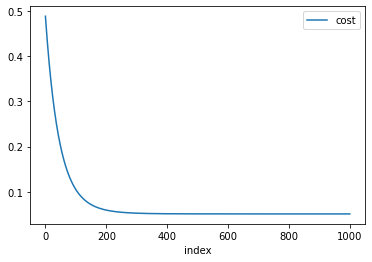

In [13]:
gradient_descent_multi(X, y, theta, alpha, iterations).reset_index().plot.line(x='index', y=['cost'])
plt.show()

## Using LinearRegression using sklearn package
Doing the same gradient descent calculation using Linear regression package

In [14]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LinearRegression()

# You don't need to specify an object to save the result because 'lr' will take the results of the fitted model.
lr.fit(X, y)

LinearRegression()

In [15]:
print(lr.intercept_)
print(lr.coef_)

2.662688569165475e-16
[ 0.75306591  0.53648155 -0.00433069  0.        ]
